<a href="https://colab.research.google.com/github/Jorge-89/Regresiones_TP_UNSAM/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import pandas as pd
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [3]:

x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]

In [4]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
#Estandarizo las features, las redes son muy sensibles a datos no escalados.
scaler_labels = StandardScaler()
x_train = scaler_labels.fit_transform(x_train)
x_test = scaler_labels.transform(x_test)

In [7]:
# Introducing the stars
import tensorflow as tf
from tensorflow import keras

In [8]:
#Defino la función neuronal
def define_model():
    keras.backend.clear_session()
    
    model = keras.models.Sequential()

    # Capa de entrada, con 8 variables
    model.add(keras.layers.Flatten(input_dim=8))
    

    # 2 capas ocultas con función de activación linear, podemos usar tambien relu.
     
               
    model.add(keras.layers.Dense(32, kernel_initializer='normal', activation='linear'))
   
    model.add(keras.layers.Dense(16, kernel_initializer='normal', activation='linear'))
    

    # Capa de salida
    model.add(keras.layers.Dense(1,kernel_initializer='normal', activation='linear'))
    model.compile(loss='mse', metrics=['mse', 'mae'], optimizer="Adam")

   
    return model





In [9]:
 model = define_model()
# Hago una corrida sin metodo de regularizacion.  
history = model.fit(epochs=100, batch_size=30, x=x_train, y=y_train, validation_data=(x_test, y_test) )
#                     callbacks=[early,])



Epoch 1/100
277/277 [==============================] - 2s 3ms/step - loss: 277.1286 - mse: 277.1286 - mae: 14.2936 - val_loss: 0.7322 - val_mse: 0.7322 - val_mae: 0.6811
Epoch 2/100
277/277 [==============================] - 1s 3ms/step - loss: 0.6749 - mse: 0.6749 - mae: 0.6532 - val_loss: 0.6873 - val_mse: 0.6873 - val_mae: 0.6604
Epoch 3/100
277/277 [==============================] - 1s 3ms/step - loss: 0.6555 - mse: 0.6555 - mae: 0.6427 - val_loss: 0.6756 - val_mse: 0.6756 - val_mae: 0.6554
Epoch 4/100
277/277 [==============================] - 1s 3ms/step - loss: 0.6479 - mse: 0.6479 - mae: 0.6382 - val_loss: 0.6793 - val_mse: 0.6793 - val_mae: 0.6512
Epoch 5/100
277/277 [==============================] - 1s 3ms/step - loss: 0.6439 - mse: 0.6439 - mae: 0.6345 - val_loss: 0.6704 - val_mse: 0.6704 - val_mae: 0.6449
Epoch 6/100
277/277 [==============================] - 1s 3ms/step - loss: 0.6443 - mse: 0.6443 - mae: 0.6318 - val_loss: 0.6813 - val_mse: 0.6813 - val_mae: 0.6470
Epoch

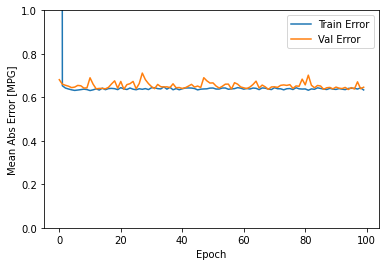

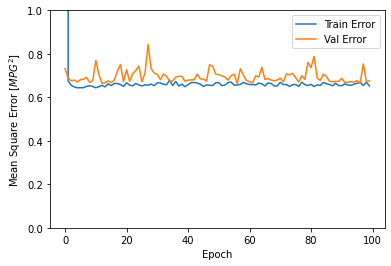

In [10]:


# se puede observar como el error de entrenamiento va disminuyendo, pero el de validación aumenta. Un claro sobreajuste
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [11]:
y_pred_test = model.predict(x_test)
y_pred_test

array([[24.301506],
       [27.22733 ],
       [14.716069],
       ...,
       [34.239902],
       [27.886982],
       [29.249   ]], dtype=float32)

In [12]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= True)

print (score_testeo)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.6756447764831627


In [ ]:
# To start from scratch, siempre aplicar esto antes de tocar otros hiperparametros o construir otro modelo, mas info en https://keras.io/api/utils/backend_utils/
keras.backend.clear_session()




In [14]:
#Early es un buen metodo de regularizacion, en patience aplicamos un 30 para que al menos tengan que pasar 20 epoch antes de hacer una parada.
early = keras.callbacks.EarlyStopping(patience=30, monitor='val_loss', restore_best_weights=True)

In [17]:
 model = define_model()
 model.compile(loss='mse', metrics=['mse', 'mae'], optimizer="Adam")
 #en regresión las loss usada es mse y como metrica tambien la podemos usar, como optimizador es sumamente usado Adam
 model.fit(epochs=150, batch_size=32, x=x_train, y=y_train, validation_data=(x_test, y_test),
                    callbacks=[early])

Epoch 1/150
260/260 [==============================] - 1s 3ms/step - loss: 301.7061 - mse: 301.7061 - mae: 15.5970 - val_loss: 1.1151 - val_mse: 1.1151 - val_mae: 0.8178
Epoch 2/150
260/260 [==============================] - 1s 3ms/step - loss: 0.6885 - mse: 0.6885 - mae: 0.6577 - val_loss: 0.6848 - val_mse: 0.6848 - val_mae: 0.6579
Epoch 3/150
260/260 [==============================] - 1s 3ms/step - loss: 0.6566 - mse: 0.6566 - mae: 0.6436 - val_loss: 0.6781 - val_mse: 0.6781 - val_mae: 0.6549
Epoch 4/150
260/260 [==============================] - 1s 3ms/step - loss: 0.6474 - mse: 0.6474 - mae: 0.6370 - val_loss: 0.6689 - val_mse: 0.6689 - val_mae: 0.6469
Epoch 5/150
260/260 [==============================] - 1s 2ms/step - loss: 0.6410 - mse: 0.6410 - mae: 0.6336 - val_loss: 0.6795 - val_mse: 0.6795 - val_mae: 0.6489
Epoch 6/150
260/260 [==============================] - 1s 3ms/step - loss: 0.6471 - mse: 0.6471 - mae: 0.6356 - val_loss: 0.6774 - val_mse: 0.6774 - val_mae: 0.6453
Epoch

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


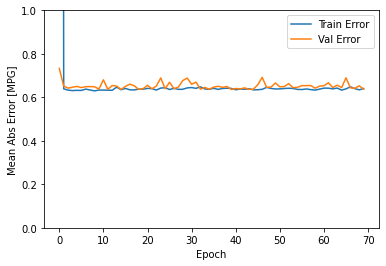

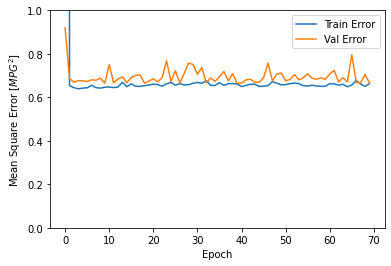

In [16]:
# vemos como se regula el modelo evitando el sobreajuste

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [19]:
y_pred_test = model.predict(x_test)
y_pred_test

array([[24.42071 ],
       [27.116055],
       [14.71207 ],
       ...,
       [34.136726],
       [27.754208],
       [29.07528 ]], dtype=float32)

In [20]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= True)

print (score_testeo)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.6642331940284714


In [22]:
model.evaluate(x_test, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.6642 - mse: 0.6642 - mae: 0.6387


[0.6642332077026367, 0.6642332077026367, 0.6386862397193909]

In [ ]:
#Veamos como se comporta el modelo con CV y con hiperparametros obtenidos de GriSearchCV 
   
    # To start from scratch
keras.backend.clear_session()
#Luego de tener un modelo con regularización es conveniente usar un CV y tener un mse para ver como se comporta con datos que nunca observo.
regressor = KerasRegressor(build_fn = define_model, batch_size = 32, epochs = 58)
errores = cross_val_score(regressor, x_test, y_test, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)
errores = -errores
errores

array([0.5915357 , 0.6934612 , 0.77006715, 0.59810498, 0.74754497])

In [ ]:
#Un MSE promedio parecido al obtenido con early, no se observa mucha varianza en los 5 errores del CV
print(errores.mean(), errores.std())

0.6801428011113156 0.07401113926438624


**Esta parte es opcional, ya que se construye una grilla para saber que hiperparametros pueden ser mejores, pero consume al menos 1 hora.**

In [ ]:
def define_model(optimizer,activation):
    keras.backend.clear_session()
    
    model = keras.models.Sequential()

    # Input layer
    model.add(keras.layers.Flatten(input_dim=8))
    

    # Two hidden layers with 32 units each
    model.add(keras.layers.Dense(64, kernel_initializer='normal', activation='relu'))
    
               
    model.add(keras.layers.Dense(32, kernel_initializer='normal', activation='relu'))
   
    model.add(keras.layers.Dense(16, kernel_initializer='normal', activation='relu'))
    

    # Output layer. As this is a multi-class classification problem, use K (here 10) units.
    model.add(keras.layers.Dense(1, input_dim=8,kernel_initializer='normal', activation='relu'))
    model.compile(loss='mse', metrics=['mse', 'mae'], optimizer=optimizer)

   
    return model


In [ ]:
keras.backend.clear_session()

In [ ]:

regressor = KerasRegressor(build_fn = define_model)


In [ ]:
parameters= {"batch_size": [25,32], "epochs":[100,200], "optimizer":["Adam", "rmsprop"], "activation":["relu","linear"]}

In [ ]:
grilla = GridSearchCV(estimator=regressor, param_grid= parameters,scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
                      
                      
grilla.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 40.6min finished


Epoch 1/100
260/260 [==============================] - 1s 1ms/step - loss: 212.1447 - mse: 212.1447 - mae: 11.8410
Epoch 2/100
260/260 [==============================] - 0s 1ms/step - loss: 7.9486 - mse: 7.9486 - mae: 1.9308
Epoch 3/100
260/260 [==============================] - 0s 1ms/step - loss: 0.7337 - mse: 0.7337 - mae: 0.6684
Epoch 4/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6653 - mse: 0.6653 - mae: 0.6399
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6610 - mse: 0.6610 - mae: 0.6386
Epoch 6/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6502 - mse: 0.6502 - mae: 0.6327
Epoch 7/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6490 - mse: 0.6490 - mae: 0.6314
Epoch 8/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6477 - mse: 0.6477 - mae: 0.6320
Epoch 9/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6468 - mse: 0.6468 - mae: 0.6328
Epoch

GridSearchCV(cv=5, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f428d0b1390>,
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'linear'],
                         'batch_size': [25, 32], 'epochs': [100, 200],
                         'optimizer': ['Adam', 'rmsprop']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
grilla.best_params_

{'activation': 'linear', 'batch_size': 32, 'epochs': 100, 'optimizer': 'Adam'}

In [ ]:
grilla.best_score_

-0.6343268432237279

In [ ]:
# Fit best model
modelo=grilla.best_estimator_


In [ ]:

#se puede usar scoring='neg_root_mean_squared_error' tambien que seria la raiz
MSE_modelo=cross_val_score(modelo,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
errores = -MSE_modelo
MSE_modelo

Epoch 1/100
52/52 [==============================] - 0s 1ms/step - loss: 513.0964 - mse: 513.0964 - mae: 21.8877
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 264.8586 - mse: 264.8586 - mae: 14.4842
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 78.5746 - mse: 78.5746 - mae: 7.3262
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 60.6968 - mse: 60.6968 - mae: 6.4488
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 39.7255 - mse: 39.7255 - mae: 5.2634
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 17.8972 - mse: 17.8972 - mae: 3.4869
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 5.7775 - mse: 5.7775 - mae: 1.9226
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 2.1890 - mse: 2.1890 - mae: 1.1530
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 1.2406 - mse: 1.2406 - mae: 0.8505
Epoch 10/1

array([-0.64012906, -0.69026436, -0.76764861, -0.60549866, -0.7820173 ])

In [ ]:
print(errores.mean(), errores.std())

0.6971115972038222 0.06909598209430678
